<a href="https://colab.research.google.com/github/MajiroZ/for_git_study/blob/master/2D_arrays_%26_gradient_problems.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##【問題1】1次関数

In [71]:
import numpy as np
x_ndarray = np.arange(-50,50,0.1)
y_ndarray = np.array(x_ndarray/2+1)
print(x_ndarray[:5])
print(y_ndarray[:5])

[-50.  -49.9 -49.8 -49.7 -49.6]
[-24.   -23.95 -23.9  -23.85 -23.8 ]


##【問題2】配列の結合

In [72]:
combined_data = np.column_stack((x_ndarray, y_ndarray))
combined_data

array([[-50.  , -24.  ],
       [-49.9 , -23.95],
       [-49.8 , -23.9 ],
       ...,
       [ 49.7 ,  25.85],
       [ 49.8 ,  25.9 ],
       [ 49.9 ,  25.95]])

##【問題3】勾配を求める

In [42]:
gradient = []
for i in range(len(x_ndarray)-1):
    gradient.append((y_ndarray[i+1]-y_ndarray[i])/(x_ndarray[i+1]-x_ndarray[i]))
print(gradient[:10])

[0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]


##【問題4】グラフを描く

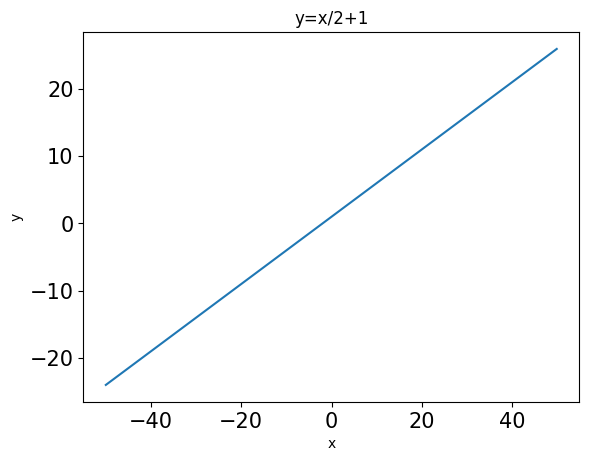

In [43]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.title("y=x/2+1")
plt.xlabel("x")
plt.ylabel("y")
plt.tick_params(labelsize=15)
plt.plot(x_ndarray, y_ndarray)
plt.show()

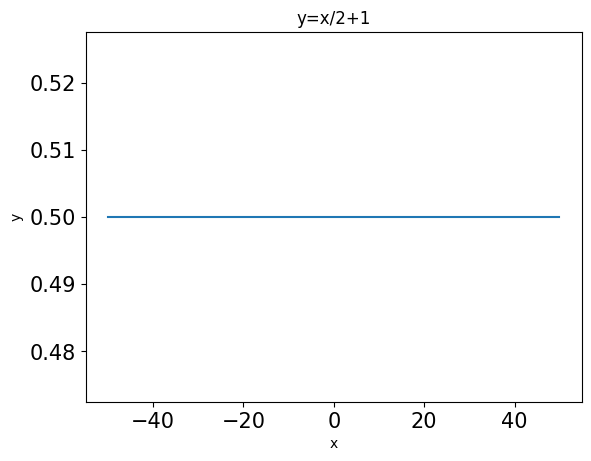

In [44]:
plt.title("y=x/2+1")
plt.xlabel("x")
plt.ylabel("y")
plt.tick_params(labelsize=15)
plt.plot(x_ndarray[1:], gradient)
plt.show()

##【問題5】Pythonの関数化

In [69]:
def compute_gradient(function, x_range=(-50, 50.1, 0.1)):
  x_ndarray = np.arange(*x_range)
  y_ndarray = function(x_ndarray)
  array_xy = np.column_stack((x_ndarray, y_ndarray))
  gradient=[]
  for i in range(len(x_ndarray)-1):
    gradient.append((y_ndarray[i+1]-y_ndarray[i])/(x_ndarray[i+1]-x_ndarray[i]))
  return array_xy, gradient

y = x**2 (-50 <= x <= 50)

In [70]:
def function1(array_x):
    array_y = array_x**2
    return array_y

array_xy, gradient = compute_gradient(function1)
print(array_xy[:5])
print(gradient[:5])

[[ -50.   2500.  ]
 [ -49.9  2490.01]
 [ -49.8  2480.04]
 [ -49.7  2470.09]
 [ -49.6  2460.16]]
[-99.90000000000094, -99.70000000000113, -99.49999999999677, -99.3000000000015, -99.10000000000169]


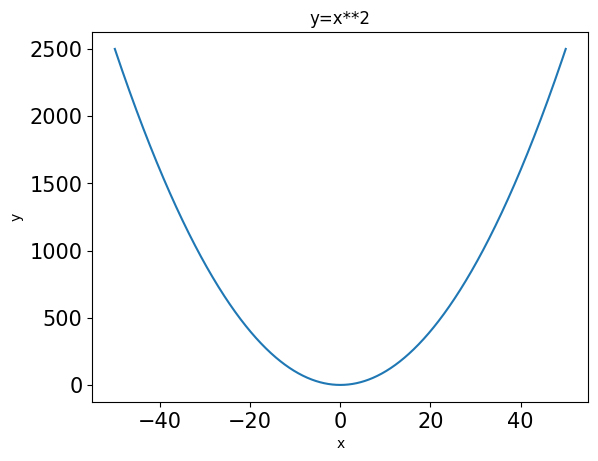

In [47]:
plt.title("y=x**2")
plt.xlabel("x")
plt.ylabel("y")
plt.tick_params(labelsize=15)
plt.plot(array_xy[:, 0], array_xy[:, 1])
plt.show()

y = 2x**2 + 2**x (-50 <= x <= 50)

In [48]:
def function2(array_x):
    array_y = 2 * array_x**2 + 2**array_x
    return array_y

array_xy, gradient = compute_gradient(function2)
print(array_xy[:5])
print(gradient[:5])

[[ -50.   5000.  ]
 [ -49.9  4980.02]
 [ -49.8  4960.08]
 [ -49.7  4940.18]
 [ -49.6  4920.32]]
[-199.8000000000019, -199.40000000000225, -198.99999999999355, -198.600000000003, -198.20000000000337]


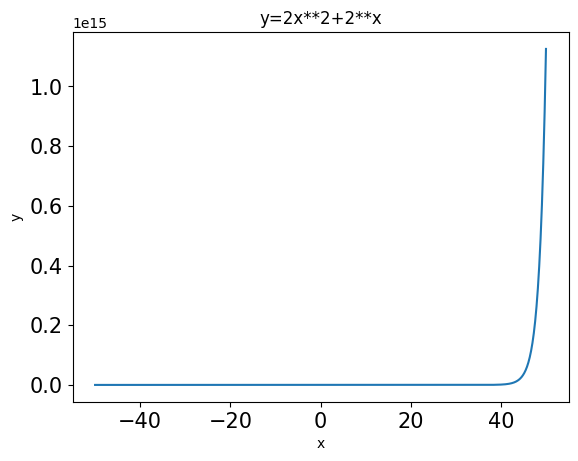

In [49]:
plt.title("y=2x**2+2**x")
plt.xlabel("x")
plt.ylabel("y")
plt.tick_params(labelsize=15)
plt.plot(array_xy[:, 0], array_xy[:, 1])
plt.show()

y=sin(x**0.5)

In [81]:
def compute_gradient(function, x_range=(0, 50.1, 0.1)):
    x_ndarray3 = np.arange(*x_range)
    y_ndarray3 = function(x_ndarray3)
    array_xy3 = np.column_stack((x_ndarray3, y_ndarray3))
    gradient3 = []
    for i in range(len(x_ndarray3) - 1):
        gradient3.append((y_ndarray3[i + 1] - y_ndarray3[i]) / (x_ndarray3[i + 1] - x_ndarray3[i]))
    return array_xy3, gradient3

In [82]:
def function3(array_x3):
    array_y3 = np.sin(array_x3**0.5)
    return array_y3

array_xy3, gradient3 = compute_gradient(function3)
print(array_xy3[:5])
print(gradient3[:5])

[[0.         0.        ]
 [0.1        0.31098359]
 [0.2        0.43245484]
 [0.3        0.5207443 ]
 [0.4        0.59112712]]
[3.109835929071857, 1.2147124604668424, 0.8828946055885059, 0.7038281770257261, 0.5850982186476928]


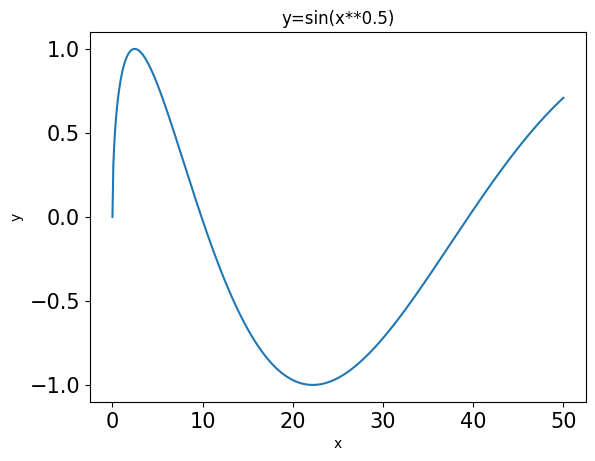

In [75]:
plt.title("y=sin(x**0.5)")
plt.xlabel("x")
plt.ylabel("y")
plt.tick_params(labelsize=15)
plt.plot(array_xy3[:, 0], array_xy3[:, 1])
plt.show()

##【問題6】最小値を求める

y = x**2 (-50 <= x <= 50)

In [84]:
array_xy, gradient = compute_gradient(function1)

argmin = np.argmin(array_xy[:,1])
y_min = array_xy[argmin, 1]
x_at_min_y = array_xy[argmin, 0]

# 前後の勾配
gradient_before = gradient[argmin - 1] if argmin > 0 else None  # 最小値が最初の要素ならNone
gradient_after = gradient[argmin] if argmin < len(gradient) else None  # 最小値が最後の要素ならNone

# 結果表示
print(f"yの最小値: {y_min}")
print(f"最小のyをとるx: {x_at_min_y}")
print(f"最小値の前の勾配: {gradient_before}")
print(f"最小値の後の勾配: {gradient_after}")

yの最小値: 0.0
最小のyをとるx: 0.0
最小値の前の勾配: None
最小値の後の勾配: 0.10000000000000002


y = 2x2 + 2x (-50 <= x <= 50)

In [85]:
array_xy, gradient = compute_gradient(function2)

argmin = np.argmin(array_xy[:,1])
y_min = array_xy[argmin, 1]
x_at_min_y = array_xy[argmin, 0]

# 前後の勾配
gradient_before = gradient[argmin - 1] if argmin > 0 else None  # 最小値が最初の要素ならNone
gradient_after = gradient[argmin] if argmin < len(gradient) else None  # 最小値が最後の要素ならNone

# 結果表示
print(f"yの最小値: {y_min}")
print(f"最小のyをとるx: {x_at_min_y}")
print(f"最小値の前の勾配: {gradient_before}")
print(f"最小値の後の勾配: {gradient_after}")

yの最小値: 1.0
最小のyをとるx: 0.0
最小値の前の勾配: None
最小値の後の勾配: 0.9177346253629315


y=sin(x**0.5)

In [83]:
array_xy3, gradient3 = compute_gradient(function3)

# ndarrayの最小値とそのインデックス
argmin = np.argmin(array_xy3[:, 1])
y_min = array_xy3[argmin, 1]
x_at_min_y = array_xy3[argmin, 0]

# 前後の勾配
gradient_before = gradient3[argmin - 1] if argmin > 0 else None  # 最小値が最初の要素ならNone
gradient_after = gradient3[argmin] if argmin < len(gradient3) else None  # 最小値が最後の要素ならNone

# 結果表示
print(f"yの最小値: {y_min}")
print(f"最小のyをとるx: {x_at_min_y}")
print(f"最小値の前の勾配: {gradient_before}")
print(f"最小値の後の勾配: {gradient_after}")

yの最小値: -0.9999997540298113
最小のyをとるx: 22.200000000000003
最小値の前の勾配: -0.0006388422559544435
最小値の後の勾配: 0.0004874477930660974
